

This notebook shows relationships between model complexity and generalization performance by adjusting key parameters.
Part 1 is regression and Part 2 is classification.


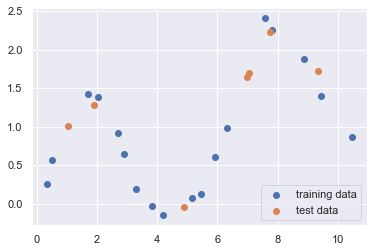

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

np.random.seed(0)
n = 25
x = np.linspace(0,10,n) + np.random.randn(n)/5
y = np.sin(x)+x/6 + np.random.randn(n)/10

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

# plotting a scatterplot of the data points

%matplotlib inline
sns.set_theme()
plt.figure()
plt.scatter(X_train, y_train, label='training data')
plt.scatter(X_test, y_test, label='test data')
plt.legend(loc=4)
    



A function will fit a polynomial LinearRegression model on the training data for degrees 1, 3, 6, and 9. 
Each model will predict 100 values over an interval x = 0 to 10. They will be stored in a numpy array. The first row of this array will be the output from the model trained on degree 1, the second row degree 3, the third row degree 6, and the fourth row degree 9.
The function returns a numpy array with shape `(4, 100)`

In [22]:
def linear_reg():
    
    array = np.linspace(0,10,100).reshape(-1,1)
    answer = np.empty((4,100), float)
    
    for i, degree in enumerate([1,3,6,9]):
        poly = PolynomialFeatures(degree=degree)
        X_poly = poly.fit_transform(x.reshape(-1,1))   
        X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state = 0)                                                   
        linreg = LinearRegression().fit(X_train, y_train)    
        
        my_input = poly.fit_transform(array)
        answer[i] = linreg.predict(my_input).reshape(1,-1)
       
    return answer


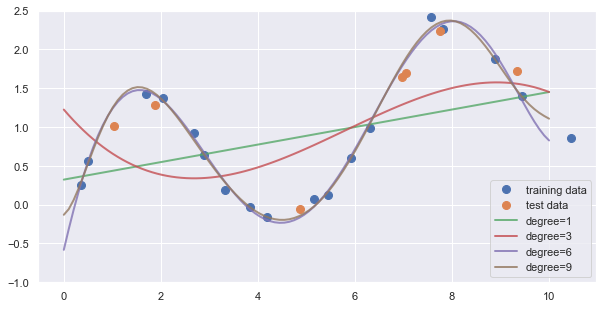

In [23]:

def plot_one(degree_predictions):
    plt.figure(figsize=(10,5))
    plt.plot(X_train, y_train, 'o', label='training data', markersize=8)
    plt.plot(X_test, y_test, 'o', label='test data', markersize=8)
    for i,degree in enumerate([1,3,6,9]):
        plt.plot(np.linspace(0,10,100), degree_predictions[i], alpha=0.8, lw=2, label='degree={}'.format(degree))
    plt.ylim(-1,2.5)
    plt.legend(loc=4)

plot_one(linear_reg())




This function fits a polynomial LinearRegression model on the training data X_train for degrees 0 through 9. For each model, there is a $R^2$ (coefficient of determination) regression score on the training and the test data. It returns both of the arrays in a tuple.

It returns a tuple of numpy arrays (r2_train, r2_test). They both have shape (10,).


In [24]:
def coef_func():

    array = np.linspace(0,10,100).reshape(-1,1)
    train = np.empty((10,), float)
    test = np.empty((10,), float)
    
    for i, degree in enumerate(range(10)):
        
        poly = PolynomialFeatures(degree=degree)
        X_poly = poly.fit_transform(x.reshape(-1,1))   
        X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state = 0)                                                   
        linreg = LinearRegression().fit(X_train, y_train)    
        
        train[i] =  linreg.score(X_train, y_train)
        test[i] = linreg.score(X_test, y_test)
        
    return (train,test) 

coef_func()  

(array([0.        , 0.19505293, 0.23307383, 0.33465173, 0.78659011,
        0.96234607, 0.99100083, 0.99102078, 0.99117904, 0.99262681]),
 array([-0.51297053, -0.10743146, -0.04467731,  0.2663471 ,  0.76101112,
         0.86091947,  0.93576729,  0.93371182,  0.92552117,  0.92794581]))


Looking at the $R^2$ scores for degree levels 0 through 9, we can see the degree level that corresponds to a model that is underfitting, overfitting, and good generalization performance for this dataset.


Underfitting, Overfitting, Good_Generalization

Text(0, 0.5, 'Coefficient of determination')

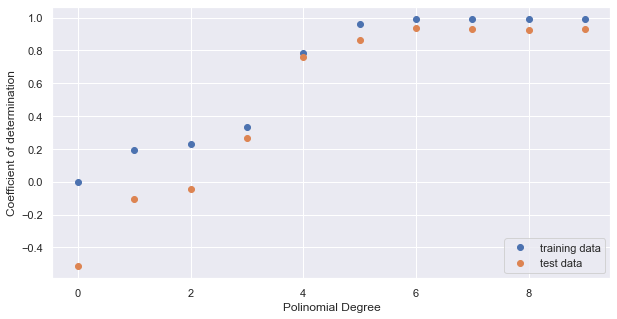

In [25]:

r_2 = coef_func()
degree = np.full((10, ), range(10))    
plt.figure(figsize=(10,5))
plt.plot(degree, r_2[0], 'o', label='training data')  
plt.plot(degree, r_2[1], 'o', label='test data')
plt.legend(loc=4)
plt.xlabel('Polinomial Degree')
plt.ylabel('Coefficient of determination')
    


Now I'll train two models: a non-regularized LinearRegression model with default parameters and a regularized Lasso Regression model on polynomial features of degree 12. I want to find the $R^2$ score for both model's test sets.


In [28]:
def compare():

    poly = PolynomialFeatures(degree=12)
    X_poly = poly.fit_transform(x.reshape(-1,1))  
    
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state = 0) 
    
    linreg = LinearRegression().fit(X_train, y_train)    
    LinearRegression_R2_test_score = linreg.score(X_test, y_test)

    alpha = 0.1
    linlasso = Lasso(alpha, max_iter = 100000, tol=0.1).fit(X_train, y_train)
    Lasso_R2_test_score = linlasso.score(X_test, y_test)

    return (LinearRegression_R2_test_score, Lasso_R2_test_score) 

compare()    

(0.8809947954663548, 0.9005029927177977)

Next, we can try different alpha values to see the r^2 score

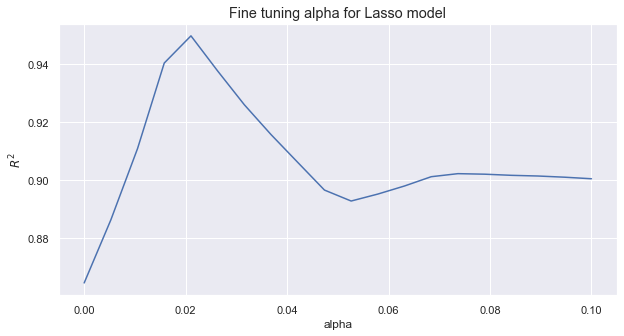

(Lasso(alpha=0.1, max_iter=1000000, tol=0.1),
 [0.8645058018332823,
  0.8863072004875687,
  0.9109497201477315,
  0.9404861503252723,
  0.9498742876489853,
  0.9377363176195429,
  0.926060423654699,
  0.9157578349326203,
  0.9061562425694285,
  0.8965963806910455,
  0.8928095982306191,
  0.8952139787253968,
  0.8980085165942553,
  0.901212888235272,
  0.9022651436312746,
  0.9020799191424294,
  0.9016889173191761,
  0.9014499714110042,
  0.9010378857573571,
  0.9005029927177977])

In [66]:
def changing_alpha(alphas):

    poly = PolynomialFeatures(degree=12)
    X_poly = poly.fit_transform(x.reshape(-1,1))  
    
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state = 0) 

    score = []
    for alpha in alphas:
        linlaso = Lasso(alpha, max_iter = 1000000, tol = 0.1).fit(X_train, y_train)
        score.append(linlaso.score(X_test, y_test))
    
    plt.figure(figsize = (10, 5))
    plt.title('Fine tuning alpha for Lasso model', fontsize='large')
    plt.xlabel('alpha', fontsize='medium')
    plt.ylabel('$R^2$')
    plt.plot(alphas, score)
    plt.show()

    return (linlaso, score)
alphas = np.linspace(0.1e-10, 0.1, 20)
changing_alpha(alphas)


We can see more clearly where the best alpha values are

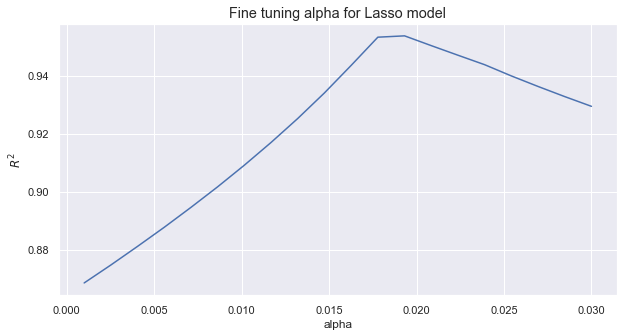

(Lasso(alpha=0.03, max_iter=1000000, tol=0.1),
 [0.868478235013,
  0.8746688002741648,
  0.8810941668213782,
  0.8876805978853423,
  0.8945448594272353,
  0.9016410166547147,
  0.9090953861335038,
  0.916929772850778,
  0.9252034944028491,
  0.9340274814595304,
  0.9435079286414134,
  0.9532415894153328,
  0.9537017174564855,
  0.9503326599696063,
  0.9470234015110235,
  0.943754662317052,
  0.9398821771748223,
  0.9362487102506817,
  0.9327513430607918,
  0.9293936873169246])

In [67]:
alphas = np.linspace(0.1e-2, 0.03, 20)
changing_alpha(alphas)


Classification example

Now we will use the [UCI Mushroom Data Set](http://archive.ics.uci.edu/ml/datasets/Mushroom?ref=datanews.io) which is in `mushrooms.csv`. The data will be used to train a model to predict whether or not a mushroom is poisonous or edible.  
The following attributes are provided:

1. cap-shape: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s 
2. cap-surface: fibrous=f, grooves=g, scaly=y, smooth=s 
3. cap-color: brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y 
4. bruises?: bruises=t, no=f 
5. odor: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s 
6. gill-attachment: attached=a, descending=d, free=f, notched=n 
7. gill-spacing: close=c, crowded=w, distant=d 
8. gill-size: broad=b, narrow=n 
9. gill-color: black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y 
10. stalk-shape: enlarging=e, tapering=t 
11. stalk-root: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=? 
12. stalk-surface-above-ring: fibrous=f, scaly=y, silky=k, smooth=s 
13. stalk-surface-below-ring: fibrous=f, scaly=y, silky=k, smooth=s 
14. stalk-color-above-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y 
15. stalk-color-below-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y 
16. veil-type: partial=p, universal=u 
17. veil-color: brown=n, orange=o, white=w, yellow=y 
18. ring-number: none=n, one=o, two=t 
19. ring-type: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z 
20. spore-print-color: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y 
21. population: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y 
22. habitat: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d

<br>

The data is currently encoded with strings. They need to be converted to numeric. Using the pd.get_dummies, they can be converted from categorical variables to indicator variables. 

In [48]:

mush_df = pd.read_csv('mushrooms.csv')
mush_df2 = pd.get_dummies(mush_df)

X_mush = mush_df2.iloc[:,2:]
y_mush = mush_df2.iloc[:,1]
print(mush_df2.head())

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_mush, y_mush, random_state=0)


   class_e  class_p  cap-shape_b  cap-shape_c  cap-shape_f  cap-shape_k  \
0        0        1            0            0            0            0   
1        1        0            0            0            0            0   
2        1        0            1            0            0            0   
3        0        1            0            0            0            0   
4        1        0            0            0            0            0   

   cap-shape_s  cap-shape_x  cap-surface_f  cap-surface_g  ...  population_s  \
0            0            1              0              0  ...             1   
1            0            1              0              0  ...             0   
2            0            0              0              0  ...             0   
3            0            1              0              0  ...             1   
4            0            1              0              0  ...             0   

   population_v  population_y  habitat_d  habitat_g  habitat_l  habi


Here is a DecisionTreeClassifier with default parameters and random_state=0. Let's see the 5 most important features.

The feature names are available in the X_train2.columns property, and the order of the features in X_train2.columns matches the order of the feature importance values in the classifier's feature_importances_ property. 


In [49]:
def decision_tree():
    from sklearn.tree import DecisionTreeClassifier

    clf = DecisionTreeClassifier().fit(X_train2, y_train2)
    name = pd.Series(X_train2.columns)
    feature = pd.Series(clf.feature_importances_)
    df = pd.concat({'name': name, 'importance': feature }, axis=1)
    
    df2 = df.sort_values(by='importance', ascending = False)
    
    return df2.iloc[:5,:]

decision_tree()

,name,importance
27,odor_n,0.625144
53,stalk-root_c,0.169176
63,stalk-surface-below-ring_y,0.100325
100,spore-print-color_r,0.034375
25,odor_l,0.023504



From sklearn.model__selection we can use the "validation_curve" function. 

The validation_curve function takes an initialized unfitted classifier object and a dataset as input. It then does its own internal train-test splits to calculate the results.

The initialized unfitted classifier will be a Support Vector Classifier with radial basis kernel with default parameters. The kernel width of the RBF kernel is controlled using the "gama" parameter.  

By using the validation_curve function one can explore the effect of gamma on the classifier accuracy.

We will find the training and test scores for 6 values of gamma from 0.0001 to 10 (np.logspace(-4,1,6)). 
The "scoring" parameter specifies what metric should be used by the validation_curve. 

For each level of gamma, validation_curve will fit 3 models on different subsets of the data, returning two 6x3 (6 levels of gamma x 3 fits per level) arrays of the scores for the training and test sets.

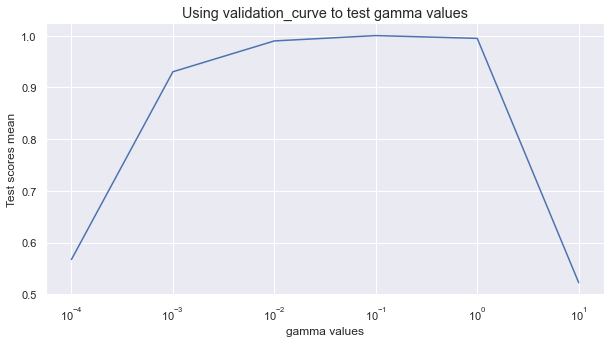

In [73]:
def validation(param_range):
    
    train_scores, test_scores = validation_curve(SVC(random_state = 0), X_test2, y_test2,
                                            param_name='gamma',
                                            param_range=param_range, cv=3, scoring = 'accuracy')
    
    train_scores_mean = np.mean(train_scores, axis = 1)
    test_scores_mean = np.mean(test_scores, axis = 1)
    
    return param_range, train_scores_mean, test_scores_mean

param_range, train_scores_mean, test_scores_mean = validation(np.logspace(-4, 1, 6))

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(param_range, test_scores_mean)
ax.set_xscale('log')
ax.set_xlabel('gamma values')
ax.set_ylabel('Test scores mean')
ax.set_title('Using validation_curve to test gamma values', fontsize='large')
plt.show()

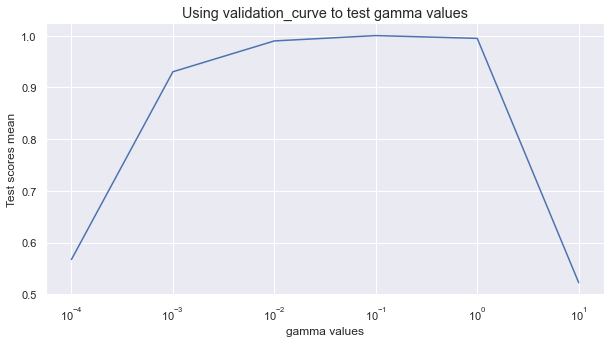

In [74]:
param_range, train_scores_mean, test_scores_mean = validation(np.logspace(-4, 1, 6))
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(param_range, test_scores_mean)
ax.set_xscale('log')
ax.set_xlabel('gamma values')
ax.set_ylabel('Test scores mean')
ax.set_title('Using validation_curve to test gamma values', fontsize='large')
plt.show()